# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

**Team Members:** Sithomile Mbuyazi,..


Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The supply of electricity plays a large role in the livelihood of citizens in a country. Electricity, amongst other things, helps us stay connected, keep warm, and feed our families. Therefore there's a need to keep the lights on in order to maintain and improve the standard of living by investing in electricity infrastructure. However, in recent years, there has been evidence that the use of purely non-renewable sources is not sustainable.



In this project, you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc.




The government of Spain is considering an expansion of its renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the country's renewable sources and fossil fuel energy generation. For this very reason, the government of Spain has been tracking the different energy sources available within the country. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')


# Libraries for data loading, data manipulation and data visulisation
import time
import pickle
import folium
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import xgboost as xgb
import pygeohash as gh
import lightgbm as lgbm


# Libraries for data preparation and model building
from sklearn import metrics
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.feature_selection import RFE
from scipy.stats import boxcox, zscore
from statsmodels.formula.api import ols
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures

# Display
%matplotlib inline
sns.set(font_scale=1)
sns.set_style("white")

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 0

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
# load the data
train_data = pd.read_csv('df_train.csv')
test_data =pd.read_csv('df_test.csv') 

In [3]:
train_data.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [4]:
test_data.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


###  Target variable

In [5]:
# This shows the column/columns that are only found in the training dataset
[name for name in train_data.columns if name not in test_data.columns]

['load_shortfall_3h']

Our target variable for this project is 'load_shortfall_3h' (units), which is Spain's three hourly shortfalls therefore it is not found in our testing set because that is what we trying to predict.

* load_shortfall_3h: The difference between the energy generated by the method of renewable energy sources, such as solar, wind, geothermal, etc., and energy generated with fossil fuels - partitioned in three-hour windows.

##### Encoding categorical data


Encoding is important because most machine learning algorithms perform better when all the variables are in a numerical format. We have five variables which are not in numeric form, "Valencia_wind_deg", "Seville_pressure". Our dataset will contain the "unnamed 0" which is independnt of other columns and it doesn't show any relationship with our target variable so it can be dropped since it is not a feature that contributes to the Spain's load shortfall for every 3 hours. We used LabelEncoder to transform these variables,

In [7]:
# Encoding categorical features with LabelEncoding
all_columns = train_data.columns
categorical_columns = [i for i in all_columns if 'Valencia_wind_deg' in i or 'Seville_pressure' in i]
new_encoded = ["new_"+ i for i in all_columns if 'Valencia_wind_deg' in i or 'Seville_pressure' in i]
lenght = len(categorical_columns)

for j in range(0,lenght):
    from sklearn.preprocessing import LabelEncoder
    L = LabelEncoder()
    train_data[new_encoded[j]] = L.fit_transform(train_data[categorical_columns[j]])


In [8]:
# Encoding the testing dataset
all_columns = test_data.columns
categorical_columns = [i for i in all_columns if 'Valencia_wind_deg' in i or 'Seville_pressure' in i]
new_encoded = ["new_"+ i for i in all_columns if 'Valencia_wind_deg' in i or 'Seville_pressure' in i]
lenght = len(categorical_columns)

for j in range(0,lenght):
    from sklearn.preprocessing import LabelEncoder
    L = LabelEncoder()
    test_data[new_encoded[j]] = L.fit_transform(test_data[categorical_columns[j]])

#### Checking how many outcomes are contained in each non numeric feature for both datatypes 

In [48]:
# Check how many unique items are in each column of indepedent variables
for col_name in train_data.columns:
    if train_data[col_name].dtypes=='object':
        unique_out = len(train_data[col_name].unique())
        print(f"Feature '{col_name}' has {unique_out} unique catergories")

Feature 'time' has 8763 unique catergories
Feature 'Valencia_wind_deg' has 10 unique catergories
Feature 'Seville_pressure' has 25 unique catergories


### Missing Data

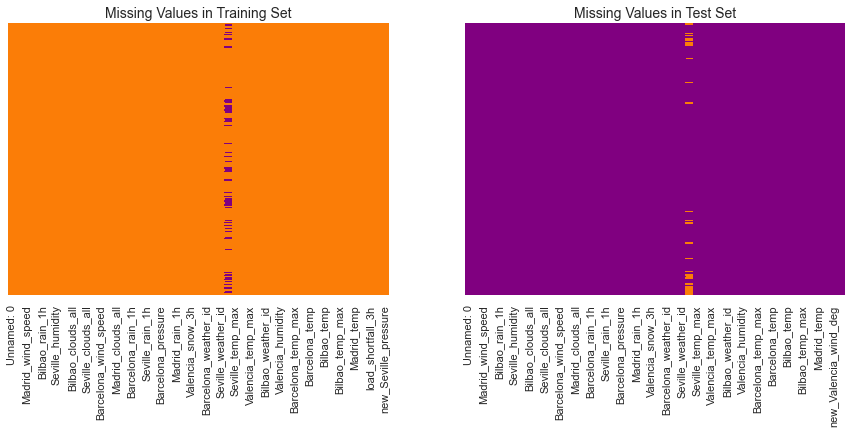

,% missing training set,% missing testing set
Valencia_pressure,23.6,15.55
Barcelona_pressure,0.0,0.00
Unnamed: 0,0.0,0.00
Seville_clouds_all,0.0,0.00
Seville_humidity,0.0,0.00
Seville_pressure,0.0,0.00
Seville_rain_1h,0.0,0.00
Seville_rain_3h,0.0,0.00
Seville_temp,0.0,0.00
Seville_temp_max,0.0,0.00


In [9]:
# Check columns for missing values
fig,axis = plt.subplots(ncols=2, figsize=(15, 5))

#Training set
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap=['#fb7d07','purple'],ax=axis[0])
axis[0].set_title('Missing Values in Training Set',fontsize=14)
#Testing set
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap=['purple','#fb7d07'],ax=axis[1])
axis[1].set_title('Missing Values in Test Set',fontsize=14)

plt.show()

# Calculate percentage missing values
train = round((train_data.isnull().sum()/train_data.isnull().count())*100,2)
test = round((test_data.isnull().sum()/test_data.isnull().count())*100,2)
d = {'% missing training set': train, '% missing testing set': test}
pd.DataFrame(data=d).sort_values(by='% missing training set',ascending=False).head(30)

Our data only misses entries from Valencia and we missing 23.6% of the training dataset for pressure from Valencia and 15.55% of the testing data. so before we can decide how we will handle the missing data it's best we dive deep and understand the whole dataset.
Since the missing data is below 40% then we going to impute it with the mean of that column for both datasets.

##### checking the shapes of our datasets 

In [10]:
train_data.shape

(8763, 51)

In [11]:
test_data.shape

(2920, 50)

#### Dealing with Outliers


Outliers are data point(s) on a graph or in a set of results that are very much bigger or smaller than the next nearest data point. It is important to identify outliers because the performance of many algorithms is sensitive to them, leading to inaccurate models and consequently poor predictions.

#### Outliers in our Training data

#### Madrid

<AxesSubplot:ylabel='Madrid_temp'>

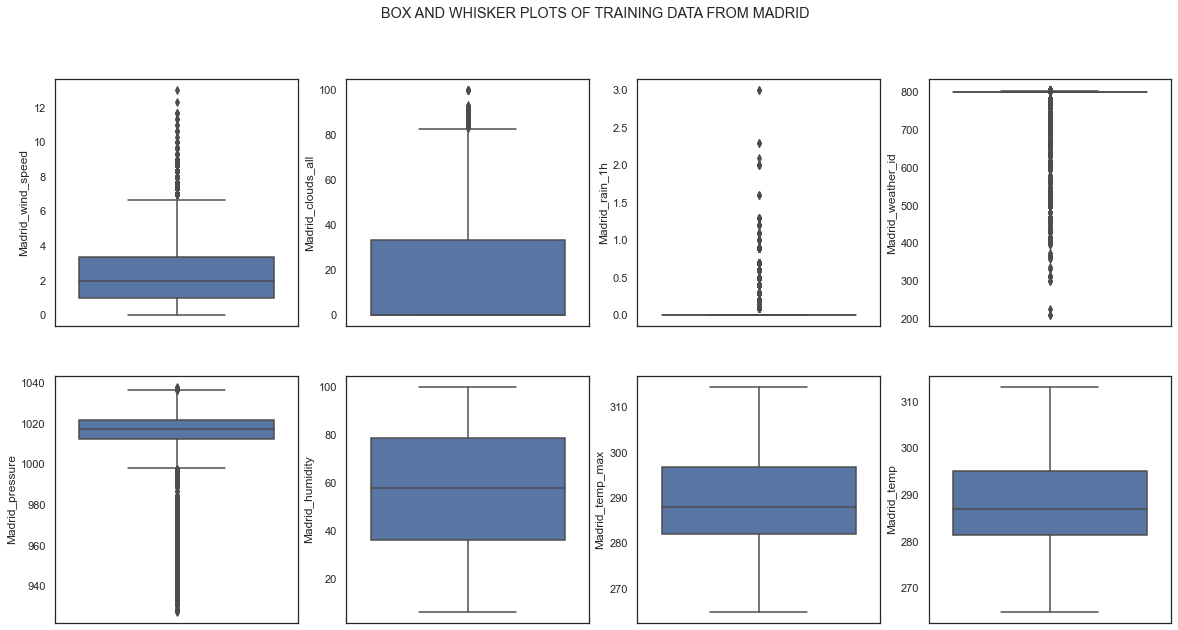

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(20,10))
fig.suptitle('BOX AND WHISKER PLOTS OF TRAINING DATA FROM MADRID')
sns.boxplot(ax = axes[0, 0], data=train_data, y='Madrid_wind_speed')
sns.boxplot(ax = axes[0, 1], data=train_data, y='Madrid_clouds_all')
sns.boxplot(ax = axes[0, 2], data=train_data, y='Madrid_rain_1h')
sns.boxplot(ax = axes[0, 3], data=train_data, y='Madrid_weather_id')
sns.boxplot(ax = axes[1, 0], data=train_data, y='Madrid_pressure')
sns.boxplot(ax = axes[1, 1], data=train_data, y='Madrid_humidity')
sns.boxplot(ax = axes[1, 2], data=train_data, y='Madrid_temp_max')
sns.boxplot(ax = axes[1, 3], data=train_data, y='Madrid_temp') 


#### Barcelona

<AxesSubplot:ylabel='load_shortfall_3h'>

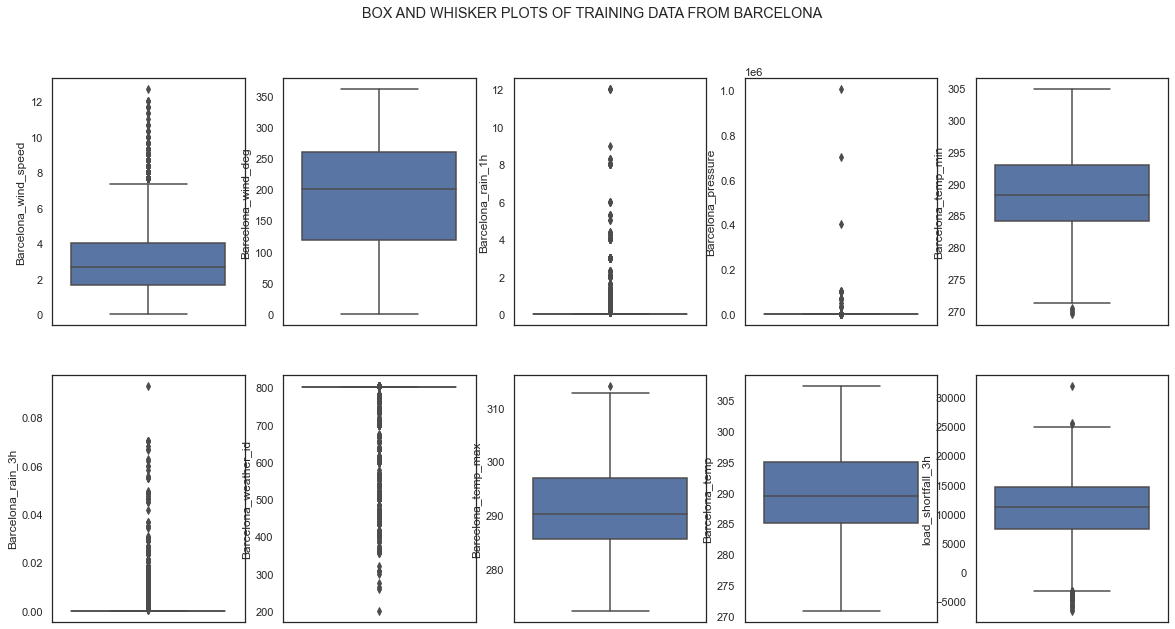

In [24]:
fig, axes = plt.subplots(2, 5, figsize=(20,10))
fig.suptitle('BOX AND WHISKER PLOTS OF TRAINING DATA FROM BARCELONA')
sns.boxplot(ax = axes[0, 0], data=train_data, y='Barcelona_wind_speed')
sns.boxplot(ax = axes[0, 1], data=train_data, y='Barcelona_wind_deg')
sns.boxplot(ax = axes[0, 2], data=train_data, y='Barcelona_rain_1h')
sns.boxplot(ax = axes[0, 3], data=train_data, y='Barcelona_pressure')
sns.boxplot(ax = axes[0, 4], data=train_data, y='Barcelona_temp_min')
sns.boxplot(ax = axes[1, 0], data=train_data, y='Barcelona_rain_3h')
sns.boxplot(ax = axes[1, 1], data=train_data, y='Barcelona_weather_id')
sns.boxplot(ax = axes[1, 2], data=train_data, y='Barcelona_temp_max')
sns.boxplot(ax = axes[1, 3], data=train_data, y='Barcelona_temp') 
sns.boxplot(ax = axes[1, 4], data=train_data, y='load_shortfall_3h')

#### Bilbao

<AxesSubplot:ylabel='Bilbao_temp'>

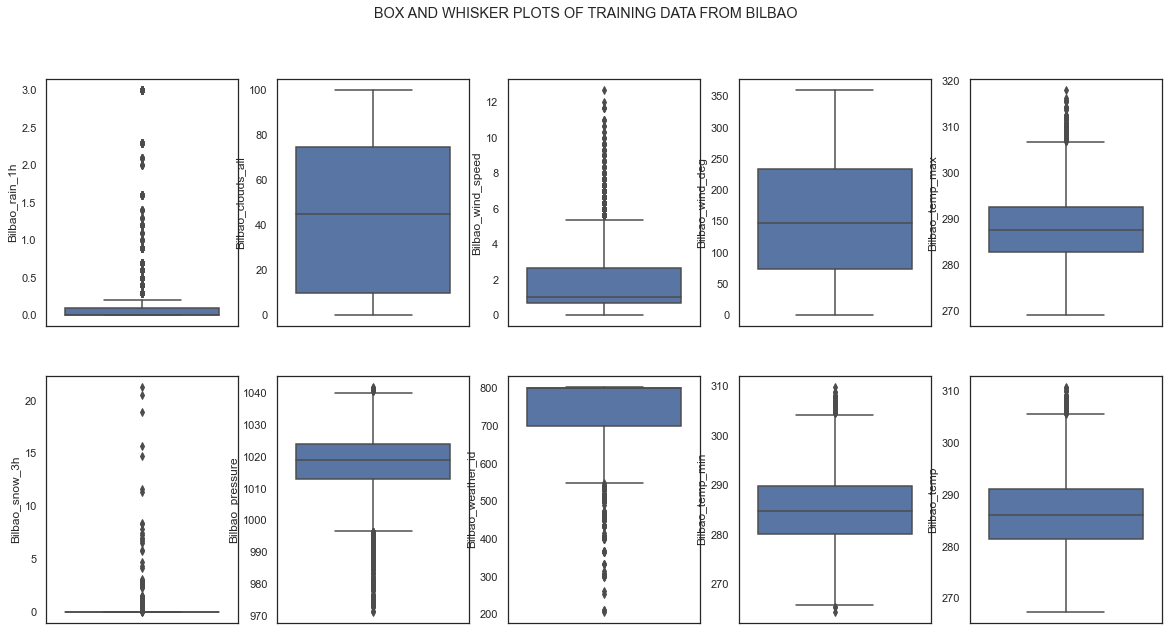

In [18]:
fig, axes = plt.subplots(2, 5, figsize=(20,10))
fig.suptitle('BOX AND WHISKER PLOTS OF TRAINING DATA FROM BILBAO')
sns.boxplot(ax = axes[0, 0], data=train_data, y='Bilbao_rain_1h')
sns.boxplot(ax = axes[0, 1], data=train_data, y='Bilbao_clouds_all')
sns.boxplot(ax = axes[0, 2], data=train_data, y='Bilbao_wind_speed')
sns.boxplot(ax = axes[0, 3], data=train_data, y='Bilbao_wind_deg')
sns.boxplot(ax = axes[0, 4], data=train_data, y='Bilbao_temp_max')
sns.boxplot(ax = axes[1, 0], data=train_data, y='Bilbao_snow_3h')
sns.boxplot(ax = axes[1, 1], data=train_data, y='Bilbao_pressure')
sns.boxplot(ax = axes[1, 2], data=train_data, y='Bilbao_weather_id')
sns.boxplot(ax = axes[1, 3], data=train_data, y='Bilbao_temp_min')
sns.boxplot(ax = axes[1, 4], data=train_data, y='Bilbao_temp')

#### Valencia

<AxesSubplot:ylabel='Valencia_temp_max'>

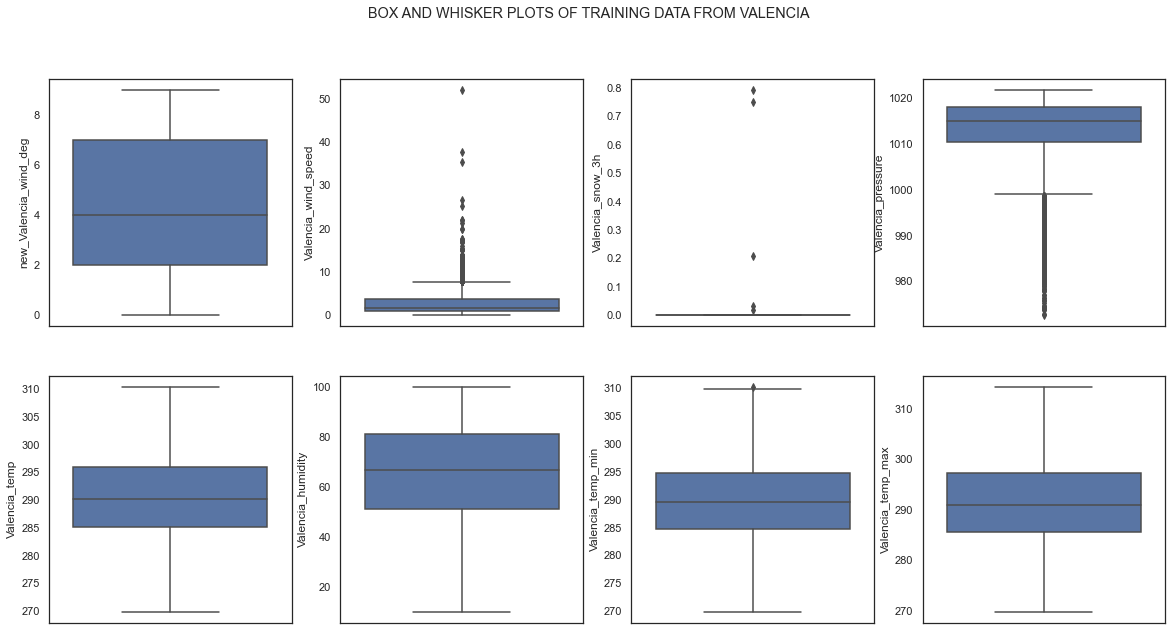

In [20]:
fig, axes = plt.subplots(2, 4, figsize=(20,10))
fig.suptitle('BOX AND WHISKER PLOTS OF TRAINING DATA FROM VALENCIA')
sns.boxplot(ax = axes[0, 0], data=train_data, y='new_Valencia_wind_deg')
sns.boxplot(ax = axes[0, 1], data=train_data, y='Valencia_wind_speed')
sns.boxplot(ax = axes[0, 2], data=train_data, y='Valencia_snow_3h')
sns.boxplot(ax = axes[0, 3], data=train_data, y='Valencia_pressure')

sns.boxplot(ax = axes[1, 0], data=train_data, y='Valencia_temp')
sns.boxplot(ax = axes[1, 1], data=train_data, y='Valencia_humidity')
sns.boxplot(ax = axes[1, 2], data=train_data, y='Valencia_temp_min')
sns.boxplot(ax = axes[1, 3], data=train_data, y='Valencia_temp_max')


#### Seville

<AxesSubplot:ylabel='Seville_temp_min'>

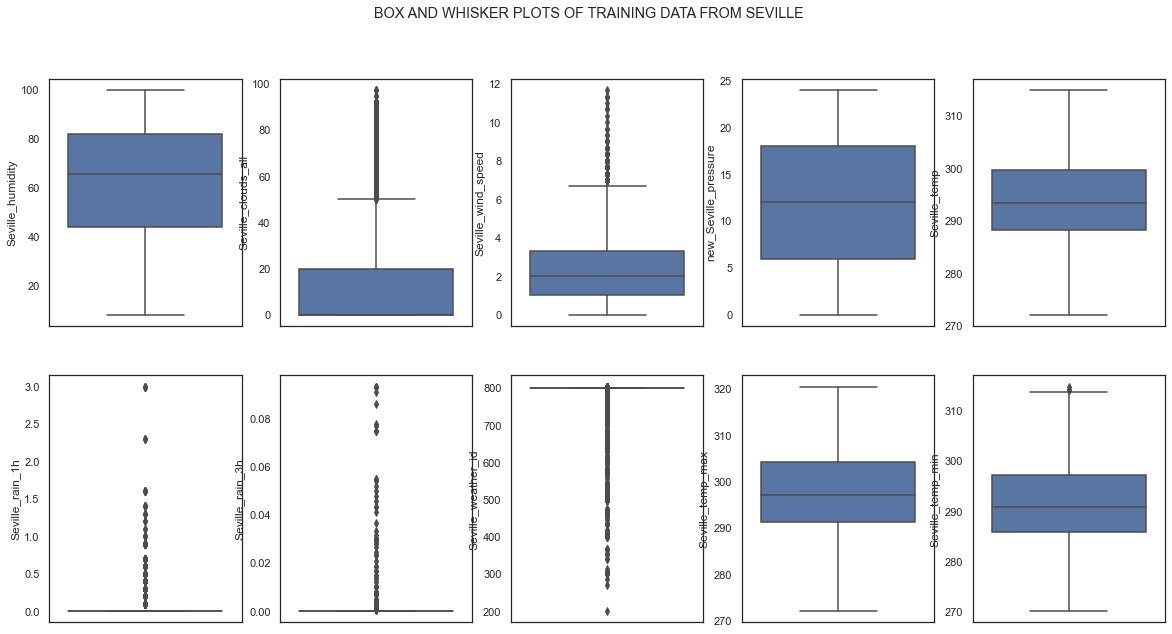

In [22]:
fig, axes = plt.subplots(2, 5, figsize=(20,10))
fig.suptitle('BOX AND WHISKER PLOTS OF TRAINING DATA FROM SEVILLE')
sns.boxplot(ax = axes[0, 0], data=train_data, y='Seville_humidity')
sns.boxplot(ax = axes[0, 1], data=train_data, y='Seville_clouds_all')
sns.boxplot(ax = axes[0, 2], data=train_data, y='Seville_wind_speed')
sns.boxplot(ax = axes[0, 3], data=train_data, y='new_Seville_pressure')
sns.boxplot(ax = axes[0, 4], data=train_data, y='Seville_temp')
sns.boxplot(ax = axes[1, 0], data=train_data, y='Seville_rain_1h')
sns.boxplot(ax = axes[1, 1], data=train_data, y='Seville_rain_3h')
sns.boxplot(ax = axes[1, 2], data=train_data, y='Seville_weather_id')
sns.boxplot(ax = axes[1, 3], data=train_data, y='Seville_temp_max') 
sns.boxplot(ax = axes[1, 4], data=train_data, y='Seville_temp_min')

##### Relationship between the features and the target variable

Below is the scatter plot which intends to show the relationship between the "load_shortfall_3h" and a couple of the features

##### Temperature from different cities

In [ ]:
# scatter plot of Seville temperature
plt.scatter(train_data["load_shortfall_3h"],train_data["Seville_temp"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Seville_temp(average) ")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Seville_temp")
plt.tight_layout()
plt.show()

In [ ]:
# scatter plot of Barcelona temperature
plt.scatter(train_data["load_shortfall_3h"],train_data["Barcelona_temp"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Barcelona_temp(average)")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Barcelona_temp")
plt.tight_layout()
plt.show()

In [ ]:
# scatter plot of Bilbao temperature
plt.scatter(train_data["load_shortfall_3h"],train_data["Bilbao_temp"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Bilbao_temp(average)")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Bilbao_temp")
plt.tight_layout()
plt.show()

In [ ]:
# scatter plot of Madrid temperature
plt.scatter(train_data["load_shortfall_3h"],train_data["Madrid_temp"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Madrid_temp(average)")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Madrid_temp")
plt.tight_layout()
plt.show()

In [ ]:
# scatter plot of Valencia temperature
plt.scatter(train_data["load_shortfall_3h"],train_data["Valencia_temp"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Valencia_temp(average) ")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Valencia_temp")
plt.tight_layout()
plt.show()

From the above scatter plots we can see that the load shortfall has no visible relation with the temperatures from the 5 cities from Spain and this was seen with the low correlation values previously 

##### Pressure from different cities

In [ ]:
# scatter plot of Seville pressure
plt.scatter(train_data["load_shortfall_3h"],train_data["Seville_pressure"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Seville_pressure ")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Seville_pressure")
plt.tight_layout()
plt.show()

In [ ]:
# scatter plot of Barcelona pressure
plt.scatter(train_data["load_shortfall_3h"],train_data["Barcelona_pressure"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Barcelona_pressure")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Barcelona_pressure")
plt.tight_layout()
plt.show()

In [ ]:
# scatter plot of Bilbao pressure
plt.scatter(train_data["load_shortfall_3h"],train_data["Bilbao_pressure"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Bilbao_pressure")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Bilbao_pressure")
plt.tight_layout()
plt.show()

In [ ]:
# scatter plot of Madrid pressure
plt.scatter(train_data["load_shortfall_3h"],train_data["Madrid_pressure"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Madrid_pressure")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Madrid_pressure")
plt.tight_layout()
plt.show()

In [ ]:
# scatter plot of Valencia pressure
plt.scatter(train_data["load_shortfall_3h"],train_data["Valencia_pressure"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Valencia_pressure")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Valencia_pressure")
plt.tight_layout()
plt.show()

##### Humidity from different cities

In [ ]:
# scatter plot of Valencia humidity
plt.scatter(train_data["load_shortfall_3h"],train_data["Valencia_humidity"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Valencia_humidity")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Valencia_humidity")
plt.tight_layout()
plt.show()

In [ ]:
# scatter plot of Seville humidity
plt.scatter(train_data["load_shortfall_3h"],train_data["Seville_humidity"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Seville_humidity")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Seville_humidity")
plt.tight_layout()
plt.show()

In [ ]:
# scatter plot of Madrid humidity
plt.scatter(train_data["load_shortfall_3h"],train_data["Madrid_humidity"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Madrid_humidity")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Madrid_humidity")
plt.tight_layout()
plt.show()

##### Wind Speed from different cities

In [ ]:
# scatter plot of Barcelona wind speed
plt.scatter(train_data["load_shortfall_3h"],train_data["Barcelona_wind_speed"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Barcelona_wind_speed")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Barcelona_wind_speed")
plt.tight_layout()
plt.show()

In [ ]:
# scatter plot of Madrid Wind Speed
plt.scatter(train_data["load_shortfall_3h"],train_data["Madrid_wind_speed"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Madrid_wind_speed")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Madrid_wind_speed")
plt.tight_layout()
plt.show()

In [ ]:
# scatter plot of Valencia Wind Speed
plt.scatter(train_data["load_shortfall_3h"],train_data["Valencia_wind_speed"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Valencia_wind_speed")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Valencia_wind_speed")
plt.tight_layout()
plt.show() 

In [ ]:
# scatter plot of Bilbao Wind Speed
plt.scatter(train_data["load_shortfall_3h"],train_data["Bilbao_wind_speed"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Bilbao_wind_speed")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Bilbao_wind_speed")
plt.tight_layout()
plt.show()

In [ ]:
# scatter plot of Seville Wind Speed
plt.scatter(train_data["load_shortfall_3h"],train_data["Seville_wind_speed"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Seville_wind_speed")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Seville_wind_speed")
plt.tight_layout()
plt.show()

##### clouds_all from different cities

In [ ]:
# scatter plot of Bilbao clouds_all
plt.scatter(train_data["load_shortfall_3h"],train_data["Bilbao_clouds_all"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Bilbao_clouds_all")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Bilbao_clouds_all")
plt.tight_layout()
plt.show()

In [ ]:
# scatter plot of Seville clouds_all
plt.scatter(train_data["load_shortfall_3h"],train_data["Seville_clouds_all"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Seville_clouds_all")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Seville_clouds_all")
plt.tight_layout()
plt.show()

In [ ]:
# scatter plot of Madrid clouds_all
plt.scatter(train_data["load_shortfall_3h"],train_data["Madrid_clouds_all"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Madrid_clouds_all")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Madrid_clouds_all")
plt.tight_layout()
plt.show()

In [ ]:
# scatter plot of Bilbao clouds_all
plt.scatter(train_data["load_shortfall_3h"],train_data["Bilbao_clouds_all"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Bilbao_clouds_all")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Bilbao_clouds_all")
plt.tight_layout()
plt.show()

##### rain_1h from different cities

In [ ]:
# scatter plot of Bilbao rain_1h
plt.scatter(train_data["load_shortfall_3h"],train_data["Bilbao_rain_1h"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Bilbao_rain_1h")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Bilbao_rain_1h")
plt.tight_layout()
plt.show()

In [ ]:
# scatter plot of Barcelona rain_1h
plt.scatter(train_data["load_shortfall_3h"],train_data["Barcelona_rain_1h"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Barcelona_rain_1h")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Barcelona_rain_1h")
plt.tight_layout()
plt.show()

In [ ]:
# scatter plot of Seville rain_1h
plt.scatter(train_data["load_shortfall_3h"],train_data["Seville_rain_1h"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Seville_rain_1h")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Seville_rain_1h")
plt.tight_layout()
plt.show()

In [ ]:
# scatter plot of Madrid rain_1h
plt.scatter(train_data["load_shortfall_3h"],train_data["Madrid_rain_1h"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Madrid_rain_1h")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Madrid_rain_1h")
plt.tight_layout()
plt.show()

##### Wind_deg from different cities

In [ ]:
# scatter plot of Valencia wind deg
plt.scatter(train_data["load_shortfall_3h"],train_data["new_Valencia_wind_deg"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus new_Valencia_wind_deg")
plt.xlabel("load_shortfall_3h")
plt.ylabel("new_Valencia_wind_deg")
plt.tight_layout()
plt.show()


In [ ]:
# scatter plot of Bilbao wind deg
plt.scatter(train_data["load_shortfall_3h"],train_data["Bilbao_wind_deg"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Bilbao_wind_deg")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Bilbao_wind_deg")
plt.tight_layout()
plt.show()


In [ ]:
# scatter plot of Barcelona wind deg
plt.scatter(train_data["load_shortfall_3h"],train_data["Barcelona_wind_deg"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Barcelona_wind_deg")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Barcelona_wind_deg")
plt.tight_layout()
plt.show()


##### rain_3h from different cities

In [ ]:
# scatter plot of Seville rain_3h
plt.scatter(train_data["load_shortfall_3h"],train_data["Seville_rain_3h"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Seville_rain_3h")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Seville_rain_3h")
plt.tight_layout()
plt.show()

In [ ]:
# scatter plot of Bilbao rain_3h
plt.scatter(train_data["load_shortfall_3h"],train_data["Bilbao_snow_3h"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Bilbao_snow_3h")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Bilbao_snow_3h")
plt.tight_layout()
plt.show()

In [ ]:
# scatter plot of Barcelona rain_3h
plt.scatter(train_data["load_shortfall_3h"],train_data["Barcelona_rain_3h"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Barcelona_rain_3h")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Barcelona_rain_3h")
plt.tight_layout()
plt.show()

In [52]:
train_data.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

##### snow_3h from different cities

In [ ]:
# scatter plot of Bilbao snow_3h
plt.scatter(train_data["load_shortfall_3h"],train_data["Bilbao_snow_3h"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Bilbao_snow_3h")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Bilbao_snow_3h")
plt.tight_layout()
plt.show()

In [ ]:
# scatter plot of Valencia snow_3h
plt.scatter(train_data["load_shortfall_3h"],train_data["Valencia_snow_3h"] ,alpha = 0.75)
plt.title("Scatter plot of load_shortfall versus Valencia_snow_3h")
plt.xlabel("load_shortfall_3h")
plt.ylabel("Valencia_snow_3h")
plt.tight_layout()
plt.show()

#### These are the columns present in the training dataset and the testing dataset

In [25]:
train_data.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

In [26]:
test_data.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

#### Data Summary Statistics

In [27]:
train_data.kurtosis()

Unnamed: 0                 -1.200000
Madrid_wind_speed           2.036462
Bilbao_rain_1h             32.904656
Valencia_wind_speed        35.645426
Seville_humidity           -1.017983
Madrid_humidity            -1.167537
Bilbao_clouds_all          -1.533417
Bilbao_wind_speed           3.631565
Seville_clouds_all          2.155921
Bilbao_wind_deg            -1.083530
Barcelona_wind_speed        1.493635
Barcelona_wind_deg         -0.959160
Madrid_clouds_all           0.142079
Seville_wind_speed          1.398580
Barcelona_rain_1h         101.578931
Seville_rain_1h            93.840746
Bilbao_snow_3h            806.128471
Barcelona_pressure       3687.564230
Seville_rain_3h           413.136592
Madrid_rain_1h             76.584491
Barcelona_rain_3h         187.800460
Valencia_snow_3h         4089.323165
Madrid_weather_id           9.259047
Barcelona_weather_id        5.701882
Bilbao_pressure             1.825323
Seville_weather_id         10.710308
Valencia_pressure           2.211823
S

In [28]:
test_data.kurtosis()

Unnamed: 0                 -1.200000
Madrid_wind_speed           2.567383
Bilbao_rain_1h             16.905396
Valencia_wind_speed         2.100244
Seville_humidity           -0.710306
Madrid_humidity            -1.134569
Bilbao_clouds_all          -1.488942
Bilbao_wind_speed           2.306390
Seville_clouds_all          1.417797
Bilbao_wind_deg            -1.017392
Barcelona_wind_speed        1.410571
Barcelona_wind_deg         -0.956300
Madrid_clouds_all          -0.566527
Seville_wind_speed          2.369604
Barcelona_rain_1h          52.069367
Seville_rain_1h            48.243445
Bilbao_snow_3h              0.000000
Barcelona_pressure          1.175366
Seville_rain_3h          2920.000000
Madrid_rain_1h             41.250278
Barcelona_rain_3h        1642.238858
Valencia_snow_3h            0.000000
Madrid_weather_id           5.349404
Barcelona_weather_id        6.056749
Bilbao_pressure             1.866927
Seville_weather_id          9.557456
Valencia_pressure           4.966557
S

From the above results, we can tell that a few features have outliers and to support this statement; we will use kurtosis.

**Kurtosis** is the measure of outliers present in the data. **High kurtosis (greater than 3)** indicates a large number of outliers and **low kurtosis (less than 3)** a lack of outliers. 

#### skewness in our data

In [29]:
train_data.skew()

Unnamed: 0                0.000000
Madrid_wind_speed         1.441144
Bilbao_rain_1h            5.222802
Valencia_wind_speed       3.499637
Seville_humidity         -0.310175
Madrid_humidity          -0.057378
Bilbao_clouds_all        -0.053085
Bilbao_wind_speed         1.716914
Seville_clouds_all        1.814452
Bilbao_wind_deg           0.226927
Barcelona_wind_speed      1.057331
Barcelona_wind_deg       -0.180001
Madrid_clouds_all         1.246745
Seville_wind_speed        1.151006
Barcelona_rain_1h         8.726988
Seville_rain_1h           8.067341
Bilbao_snow_3h           26.177568
Barcelona_pressure       57.979664
Seville_rain_3h          19.342574
Madrid_rain_1h            7.074308
Barcelona_rain_3h        12.696605
Valencia_snow_3h         63.298084
Madrid_weather_id        -3.107722
Barcelona_weather_id     -2.584011
Bilbao_pressure          -0.999642
Seville_weather_id       -3.275574
Valencia_pressure        -1.705162
Seville_temp_max         -0.033931
Madrid_pressure     

In [30]:
test_data.skew()

Unnamed: 0                0.000000
Madrid_wind_speed         1.494269
Bilbao_rain_1h            3.404307
Valencia_wind_speed       1.328872
Seville_humidity         -0.508637
Madrid_humidity          -0.135537
Bilbao_clouds_all        -0.124933
Bilbao_wind_speed         1.381876
Seville_clouds_all        1.628723
Bilbao_wind_deg           0.322569
Barcelona_wind_speed      1.080200
Barcelona_wind_deg       -0.029036
Madrid_clouds_all         0.925034
Seville_wind_speed        1.346297
Barcelona_rain_1h         5.989675
Seville_rain_1h           6.269205
Bilbao_snow_3h            0.000000
Barcelona_pressure       -0.572509
Seville_rain_3h          54.037024
Madrid_rain_1h            5.211963
Barcelona_rain_3h        40.017330
Valencia_snow_3h          0.000000
Madrid_weather_id        -2.439600
Barcelona_weather_id     -2.577583
Bilbao_pressure          -0.952458
Seville_weather_id       -3.103741
Valencia_pressure        -1.779108
Seville_temp_max          0.473503
Madrid_pressure     

What is interesting to note here is the skewness of the load shortfall for every 3 hours is -0.384847 which means we will see a normal distribution like graph when we plot the graph of load_shortfall_3h versus frequency. 

#### Information about our data

In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             8763 non-null   int64  
 1   time                   8763 non-null   object 
 2   Madrid_wind_speed      8763 non-null   float64
 3   Valencia_wind_deg      8763 non-null   object 
 4   Bilbao_rain_1h         8763 non-null   float64
 5   Valencia_wind_speed    8763 non-null   float64
 6   Seville_humidity       8763 non-null   float64
 7   Madrid_humidity        8763 non-null   float64
 8   Bilbao_clouds_all      8763 non-null   float64
 9   Bilbao_wind_speed      8763 non-null   float64
 10  Seville_clouds_all     8763 non-null   float64
 11  Bilbao_wind_deg        8763 non-null   float64
 12  Barcelona_wind_speed   8763 non-null   float64
 13  Barcelona_wind_deg     8763 non-null   float64
 14  Madrid_clouds_all      8763 non-null   float64
 15  Sevi

In [32]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2920 non-null   int64  
 1   time                   2920 non-null   object 
 2   Madrid_wind_speed      2920 non-null   float64
 3   Valencia_wind_deg      2920 non-null   object 
 4   Bilbao_rain_1h         2920 non-null   float64
 5   Valencia_wind_speed    2920 non-null   float64
 6   Seville_humidity       2920 non-null   float64
 7   Madrid_humidity        2920 non-null   float64
 8   Bilbao_clouds_all      2920 non-null   float64
 9   Bilbao_wind_speed      2920 non-null   float64
 10  Seville_clouds_all     2920 non-null   float64
 11  Bilbao_wind_deg        2920 non-null   float64
 12  Barcelona_wind_speed   2920 non-null   float64
 13  Barcelona_wind_deg     2920 non-null   float64
 14  Madrid_clouds_all      2920 non-null   float64
 15  Sevi

#### Five number summary and the quartiles of the data

In [33]:
train_data.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,new_Valencia_wind_deg,new_Seville_pressure
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612,4.292366,11.902887
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404,2.845303,6.930347
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000,0.000000,0.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333,2.000000,6.000000
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667,4.000000,12.000000
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667,7.000000,18.000000
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000,9.000000,24.000000


In [34]:
test_data.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,new_Valencia_wind_deg,new_Seville_pressure
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,...,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,10222.500000,2.457820,0.067517,3.012785,67.123516,62.644463,43.355422,2.283562,15.477283,162.643836,...,289.911289,284.920684,286.522375,289.124971,288.483641,290.152431,287.869763,286.618130,5.018493,11.813356
std,843.075718,1.774838,0.153381,1.996340,20.611292,24.138393,30.486298,1.654787,25.289197,97.749873,...,7.119411,6.803424,6.492355,7.168049,6.221324,7.906915,8.977511,8.733163,2.838281,7.944637
min,8763.000000,0.000000,0.000000,0.000000,11.666667,8.000000,0.000000,0.000000,0.000000,0.000000,...,272.650000,266.483333,268.120000,271.483333,270.138667,271.150000,268.713333,267.816667,0.000000,0.000000
25%,9492.750000,1.333333,0.000000,1.666667,52.000000,43.000000,13.333333,1.000000,0.000000,86.666667,...,284.307500,280.150000,281.778333,283.483333,284.150000,284.483333,280.816667,279.816667,3.000000,4.000000
50%,10222.500000,2.000000,0.000000,2.333333,70.333333,63.000000,45.000000,1.666667,0.000000,140.000000,...,289.483333,284.483333,286.265000,288.816667,288.483333,289.150000,286.396667,285.483333,5.000000,12.000000
75%,10952.250000,3.333333,0.000000,4.000000,85.000000,84.000000,75.000000,3.333333,20.000000,233.333333,...,295.816667,289.816667,291.119167,295.150000,292.816667,295.150000,294.452500,293.150000,8.000000,19.000000
max,11682.000000,13.333333,1.600000,14.333333,100.000000,100.000000,97.333333,10.666667,93.333333,360.000000,...,308.150000,307.483333,308.966667,306.816667,310.816667,314.483333,312.223333,310.150000,9.000000,24.000000


#### Univariate Analysis and Visualisation


In this section we will describe and visualise data that involves a single variable:

* time: Time at which the data was recorded
* {City Name}_wind_speed: The wind speed at a specific time interval for the named city.
* {City Name}_wind_degree: The strength of the wind for the named city at a specific time interval - expressed as a category.
* {City Name}_rain_1h: A metric expressing the amount of rain that has fallen in the past hour in a particular city.
* {City Name}_rain_3h:A metric expressing the amount of rain that has fallen in the past three hours in a particular city.
* {City Name}_humidity: The level of humidity as measured at the defined time for the specific city mentioned.
* {City Name}_clouds_all: The level of cloud coverage as measured at the specified point in time for the specific city mentioned.
* {City Name}_pressure: The atmospheric pressure for the named city at a specific time interval - expressed as a category.
* {City Name}_snow_3h: A metric expressing the amount of snow that has fallen in the past three hours in a particular city.
* {City Name}_weather_id: A metric used to explain the weather condition of a specific city at a specified time.
* {City Name}_temp_max: The maximum temperature for a specific city at a point in time.
* {City Name}_temp_min: The minimum temperature for a specific city at a point in time.
* {City Name}_temp: The average temperature for a specific city at a point in time.



Temperature affects the lows and highs of air pressure but air pressure can also bring in higher or lower temperatures. The speed and movement of molecules is what determines air pressure.

 ##### Proportionality of Temperature and Pressure 
 
Atmospheric pressure and temperature are proportional, meaning that when the temperature increases, air pressure increases and when temperature decreases, air pressure decreases. The relationship between temperature and air pressure is referred to as Gay-Lussac's Law. It states that as long as the volume of an object remains the same than temperature and air pressure will always be proportionate. When temperature increases the molecules in the air begin to move at a faster rate.

##### Air Pressure, Temperature and Altitude 

Atmospheric pressure decreases the higher a person ascends into the atmosphere. As a person travels to a higher altitude the temperature will decrease at first but then begin to increase slightly. Energy levels change as a person gets closer to the edge of the atmosphere which is what causes the increase in temperature. Although there's an increase in temperature, the pressure decreases because the molecules begin to move faster.

##### Air Pressure Affects Weather 

In most cases high pressure means good weather and low pressure means poor weather. High pressure can prevent the formation of clouds, allowing for blue skies and clear, warm weather. Air cools as it rises and any moisture in the air can turn into rain or snow and fall back to the ground. This is why low pressure is associated with bad weather. Meteorologists use high and low pressure systems to predict the weather.

### Distribution of load_shortfall_3h

Text(0, 0.5, 'Frequency')

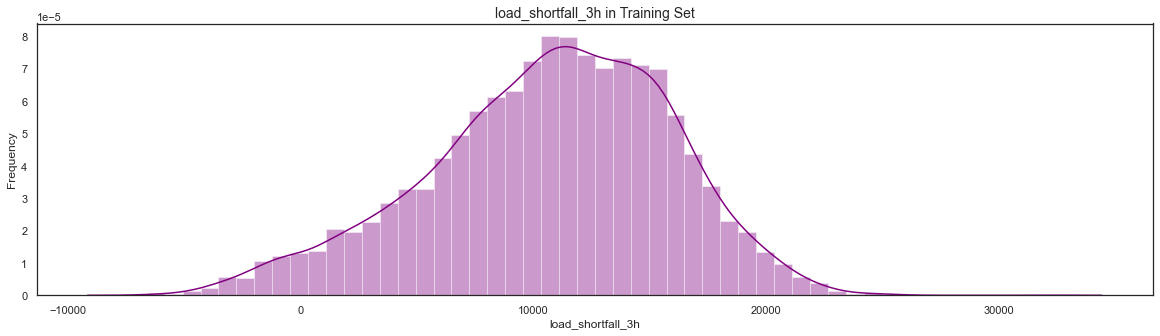

In [35]:
#plotting the distribution of the target variable
fig, ax = plt.subplots(figsize=(20,5))
sns.distplot(train_data['load_shortfall_3h'],color='purple', kde=True)
ax.set_title('load_shortfall_3h in Training Set',fontsize=14)
ax.set_xlabel('load_shortfall_3h')
ax.set_ylabel('Frequency') 

To make sure our distribution is correct, we will use the table below to understand the skewness.

|   Skew Value (x)  |       Description of Data      |
|:-------------------|:---------------:|
| -0.5 < x < 0.5              |Fairly Symmetrical |
| -1 < x < -0.5 | Moderate Negative Skew  | 
| 0.5 < x < 1             | Moderate Positive Skew  | 
|       x < -1     |High Negative Skew  | 
|       x > 1  |High Positve Skew | 


This graph roughly follow that of a normal distribution as we can see that it is fairly symmetrical around 10000 something and the mean ,the median and the mode are almost the same they all have the values 10673.8576, 11114.6667 and 12249.3333 respectively and this curve has a low kurtosis of -0.118 and a low skewness with a value of -0.385

##### Exploring the correlation between the target variable and other features as a matrix

In [36]:
# Pairwise correlation of all columnS
train_data.corr()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,new_Valencia_wind_deg,new_Seville_pressure
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,...,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612,-0.048814,-0.030704
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,...,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981,0.104954,-0.026246
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,...,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510,0.044209,-0.027683
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,...,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791,0.204874,-0.010144
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,...,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290,0.141594,-0.056700
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,...,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536,0.171478,-0.070508
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,...,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293,0.074476,0.001263
Bilbao_wind_speed,0.049197,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,...,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602,0.112475,-0.033655
Seville_clouds_all,-0.140583,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,...,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804,0.109314,-0.080132
Bilbao_wind_deg,-0.155738,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,...,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800,0.105466,-0.014040


To observe the correlations clearly, we will use a heatmap to see a few features and the target and their relationship in terms of correlation. we will do that in the Data engineering stage.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

#### Imputing missing data

In [37]:
# filling in the 23.6% of the missing pressure  from the training dataset
train_data["Valencia_pressure"] = train_data["Valencia_pressure"].fillna(train_data["Valencia_pressure"].mean())

# filling in the 15.55% of the missing pressure  from the training dataset
test_data["Valencia_pressure"] = test_data["Valencia_pressure"].fillna(test_data["Valencia_pressure"].mean())


##### Checking for missing data

In [38]:
train_data.isnull().sum()

Unnamed: 0               0
time                     0
Madrid_wind_speed        0
Valencia_wind_deg        0
Bilbao_rain_1h           0
Valencia_wind_speed      0
Seville_humidity         0
Madrid_humidity          0
Bilbao_clouds_all        0
Bilbao_wind_speed        0
Seville_clouds_all       0
Bilbao_wind_deg          0
Barcelona_wind_speed     0
Barcelona_wind_deg       0
Madrid_clouds_all        0
Seville_wind_speed       0
Barcelona_rain_1h        0
Seville_pressure         0
Seville_rain_1h          0
Bilbao_snow_3h           0
Barcelona_pressure       0
Seville_rain_3h          0
Madrid_rain_1h           0
Barcelona_rain_3h        0
Valencia_snow_3h         0
Madrid_weather_id        0
Barcelona_weather_id     0
Bilbao_pressure          0
Seville_weather_id       0
Valencia_pressure        0
Seville_temp_max         0
Madrid_pressure          0
Valencia_temp_max        0
Valencia_temp            0
Bilbao_weather_id        0
Seville_temp             0
Valencia_humidity        0
V

In [39]:
test_data.isnull().sum()

Unnamed: 0               0
time                     0
Madrid_wind_speed        0
Valencia_wind_deg        0
Bilbao_rain_1h           0
Valencia_wind_speed      0
Seville_humidity         0
Madrid_humidity          0
Bilbao_clouds_all        0
Bilbao_wind_speed        0
Seville_clouds_all       0
Bilbao_wind_deg          0
Barcelona_wind_speed     0
Barcelona_wind_deg       0
Madrid_clouds_all        0
Seville_wind_speed       0
Barcelona_rain_1h        0
Seville_pressure         0
Seville_rain_1h          0
Bilbao_snow_3h           0
Barcelona_pressure       0
Seville_rain_3h          0
Madrid_rain_1h           0
Barcelona_rain_3h        0
Valencia_snow_3h         0
Madrid_weather_id        0
Barcelona_weather_id     0
Bilbao_pressure          0
Seville_weather_id       0
Valencia_pressure        0
Seville_temp_max         0
Madrid_pressure          0
Valencia_temp_max        0
Valencia_temp            0
Bilbao_weather_id        0
Seville_temp             0
Valencia_humidity        0
V

##### Changing the names of the dataframe

In [40]:
# changing to shorter names
train=train_data
test=test_data

In [41]:
train['load_shortfall_3h'] = train.pop('load_shortfall_3h')
train= train.drop('time', axis=1)
train =train.drop("Valencia_wind_deg", axis =1)
train =train.drop("Seville_pressure", axis =1) 
train =train.drop('Unnamed: 0', axis =1)

test= test.drop('time', axis=1)
test =test.drop("Valencia_wind_deg", axis =1)
test =test.drop("Seville_pressure", axis =1)
test =test.drop('Unnamed: 0', axis =1)
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values
X_test = test.iloc[:,:].values 

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

#### Split Training Set Into Training and Validation Sets

* Training data: Data that contains a known output and the model learns on this data in order to be able to generalize other data later on.
* Validation data: This data is used to assess how well the algorithm was trained with the training data.
* Test data: Data used to provide an unbiased evaluation of a final model fit on the training dataset.

In [42]:
# split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=PARAMETER_CONSTANT)

print("X_train:", X_train[0,0:11], "... Training")
print("y_train:", y_train[0])
print("X_val:", X_val[0,0:11], "... Validation")
print("y_val:", y_val[0])
print("X_test:", X_test[0,0:11], "... Testing")

X_train: [  5.           0.           0.33333333  99.          98.33333333
  33.33333333   3.66666667  92.         192.33333333   0.66666667
 243.        ] ... Training
y_train: -1665.0
X_val: [  5.           0.           1.          82.66666667  60.33333333
  26.66666667   1.33333333  50.         134.66666667   1.66666667
 101.33333333] ... Validation
y_val: 17533.6666666667
X_test: [  5.           0.           5.          87.          71.33333333
  20.           3.           0.         193.33333333   4.
 176.66666667] ... Testing


#### Feature Scaling

In [43]:
# Make new copies for scaling
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

# Apply scaler to numeric features
sc = StandardScaler()
X_train_scaled[:,4:] = sc.fit_transform(X_train[:,4:])
X_val_scaled[:,4:] = sc.transform(X_val[:,4:])
X_test_scaled[:,4:] = sc.transform(X_test[:,4:])

#### Feature Selection

In [44]:
# Convert to dataframes
all_columns = ['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
       'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp', 'Madrid_temp_min', 'new_Valencia_wind_deg',
       'new_Seville_pressure']
# Not scaled
X_train_df = pd.DataFrame(X_train,columns=all_columns)
X_val_df = pd.DataFrame(X_val,columns=all_columns)
X_test_df = pd.DataFrame(X_test,columns=all_columns)
X_all_df = pd.DataFrame(X,columns=all_columns)

# Scaled
X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=all_columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled,columns=all_columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=all_columns)

# Convert to numeric
X_train_scaled_df = X_train_scaled_df.apply(pd.to_numeric)
X_val_scaled_df = X_val_scaled_df.apply(pd.to_numeric)
X_test_scaled_df = X_test_scaled_df.apply(pd.to_numeric)
X_train_df = X_train_df.apply(pd.to_numeric)
X_val_df = X_val_df.apply(pd.to_numeric)
X_test_df = X_test_df.apply(pd.to_numeric)
X_all_df = X_all_df.apply(pd.to_numeric)

X_train_scaled_df.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,new_Valencia_wind_deg,new_Seville_pressure
0,5.000000,0.0,0.333333,99.000000,1.674734,-0.316774,1.074466,3.242861,0.328483,-1.229937,...,0.227517,0.993728,0.774092,0.474316,0.529131,-0.123918,-0.126093,0.002881,0.961135,1.313739
1,4.000000,3.0,1.000000,41.000000,-0.920134,0.379174,-0.499662,-0.565905,1.743084,1.183667,...,-0.048823,-0.048110,-0.251323,0.178470,-0.456706,1.014739,0.397860,0.535072,-0.799673,0.449110
2,2.000000,0.0,0.666667,75.333333,1.183075,0.747617,-0.893194,0.924481,-0.923520,-1.229937,...,0.343168,0.059414,-0.145494,0.598130,-0.354961,0.228684,-0.291719,-0.165348,0.961135,0.593214
3,2.000000,0.0,5.333333,57.000000,0.254385,0.962543,-0.499662,-0.565905,0.061823,0.255358,...,-0.266905,0.061339,0.092977,-0.055005,0.160596,-0.261217,-0.199459,-0.119343,-1.151835,0.737319
4,2.333333,0.0,1.666667,85.666667,1.374276,-1.340228,2.255062,2.746065,-0.051996,-0.301628,...,-0.085098,0.209655,0.328338,0.057819,0.487752,-0.180286,-0.672106,-0.730246,0.256812,1.025529


##### Heatmap showing the correlations for all variables

We visuals the correlation between the independent variables to check which variables can be included in the final model.

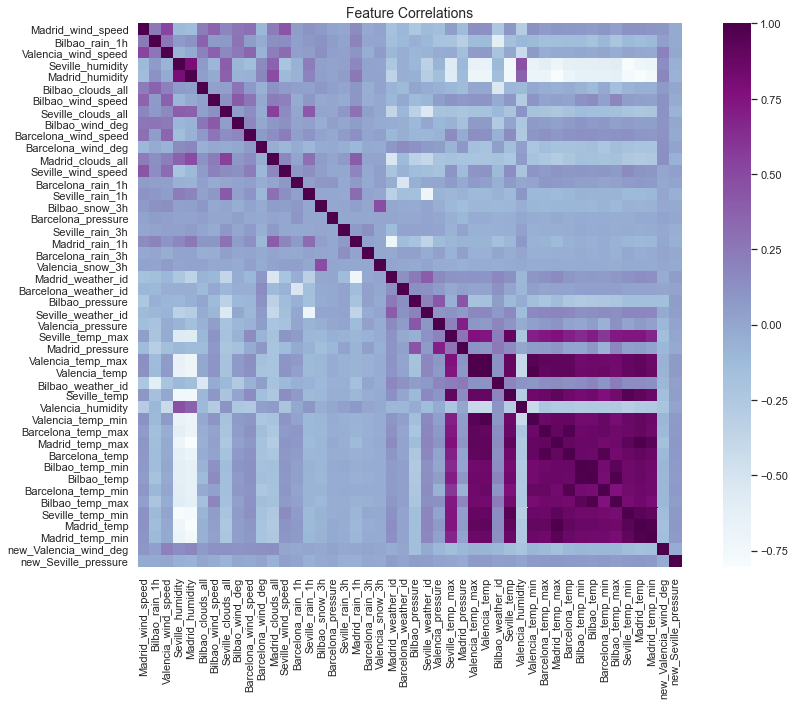

In [45]:
X_train_scaled_df['load_shortfall_3h'] = y_train

fig,axis = plt.subplots(figsize=(15, 10))
sns.heatmap(X_train_df.corr(), square=True, cmap='BuPu')
plt.title('Feature Correlations',fontsize=14)

plt.show()

In [49]:
# Fit model using statsmodels.OLS
dfm = X_train_scaled_df.copy()
# Target variable:
y_name = 'load_shortfall_3h'
# All available features
X_names = [col for col in dfm.columns if col != y_name]
# Build OLS formula string " y ~ X "
formula_str = "dfm['" + y_name + "']" + " ~ "+" + ".join("dfm['{0}']".format(x) for x in X_names);
# Fit model using model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()
# Fitted summary
print(fitted.summary())

                               OLS Regression Results                               
Dep. Variable:     dfm['load_shortfall_3h']   R-squared:                       0.154
Model:                                  OLS   Adj. R-squared:                  0.148
Method:                       Least Squares   F-statistic:                     27.48
Date:                      Sat, 06 Nov 2021   Prob (F-statistic):          6.65e-214
Time:                              01:51:32   Log-Likelihood:                -69353.
No. Observations:                      7010   AIC:                         1.388e+05
Df Residuals:                          6963   BIC:                         1.391e+05
Df Model:                                46                                         
Covariance Type:                  nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

For the feature selection process, we tried many different combinations of features based on their correlations as well as implementing the **Recursive Feature Elimination (RFE)** function from scikit-learn. However, we will only include the final set of features that resulted in the best RMSE score for our model in this notebook.

In [ ]:
# Recursive Feature Elimination
lgbm_model = lgbm.LGBMRegressor(learning_rate=0.1, min_data_in_leaf=250, num_leaves=50, objective='regression')
rfe = RFE(lgbm_model, 13)
rfe = rfe.fit(X_train, y_train)
# Summarize the selected features
keep_df = pd.DataFrame(rfe.support_,X_train_df.columns).reset_index()
keep_df = keep_df[keep_df[0]==True]
keep_df = keep_df.drop(0,axis=1)
keep_df.rename(columns={'index':'Feature'}).style.hide_index()

In [ ]:
# Final features used in model
features =  ['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
       'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp', 'Madrid_temp_min', 'new_Valencia_wind_deg',
       'new_Seville_pressure']
X_all = pd.DataFrame(X_all_df.loc[:,features],columns=features).values
X_train = pd.DataFrame(X_train_df.loc[:,features],columns=features).values
X_val = pd.DataFrame(X_val_df.loc[:,features],columns=features).values
X_test = pd.DataFrame(X_test_df.loc[:,features],columns=features).values
X_train_scaled = pd.DataFrame(X_train_scaled_df.loc[:,features],columns=features).values
X_val_scaled = pd.DataFrame(X_val_scaled_df.loc[:,features],columns=features).values

In [ ]:
# split data

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

#### Linear Regression

Simple linear regression is a statistical method that shows the relationship between two continuous variables. This is represented by a straight line with the equation:
$$ y = a + bx$$   
where $a$ is the intercept of the line with the y-axis, and $b$ is the gradient.  
The independent variable ($x$) is also known as the **predictor** and the dependent variable ($y$) is known as the **target**.

In [ ]:
modelstart= time.time()
lm = LinearRegression()
lm.fit(X_train[:,3].reshape(-1, 1), y_train)
y_pred_lm = lm.predict(X_val[:,3].reshape(-1, 1))
lm_rmse = sqrt(metrics.mean_squared_error(y_val, y_pred_lm))
lm_r2 = metrics.r2_score(y_val, y_pred_lm)

print("Testing: Linear Regression")
print('RMSE:', lm_rmse)
print('R-squared:', lm_r2)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))

#### Multiple Linear Regression

Multiple linear regression is an extension of simple linear regression. Instead of using one independent variable to predict the target variable, two or more independent variables are used. The multiple linear regression equation is:


$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n$$

In [ ]:
modelstart= time.time()
ml = LinearRegression()
ml.fit(X_train, y_train)
y_pred_ml = ml.predict(X_val)
ml_rmse = sqrt(metrics.mean_squared_error(y_val, y_pred_ml))
ml_r2 = metrics.r2_score(y_val, y_pred_ml)

print("Testing: Multiple Linear Regression")
print('RMSE:', ml_rmse)
print('R-squared:', ml_r2)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))

#### Polynomial Regression

Polynomial linear regression uses the same principles of multiple linear regression. However, alternative to fitting a line of best fit through the data, it fits a curve. The relationship between the independent variables and the dependent variable is modelled as an nth degree polynomial in the independent  variable. The polynomial linear regresion eqaution is: 

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_1^2 + ... + \beta_nX^n_1$$

In [ ]:
modelstart= time.time()
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)
y_pred_poly = regressor.predict(poly_reg.transform(X_val))
pl_rmse = sqrt(metrics.mean_squared_error(y_val, y_pred_poly))
pl_r2 = metrics.r2_score(y_val, y_pred_poly)

print("Testing: Polynomial Regression")
print('RMSE:', pl_rmse)
print('R-squared:', pl_r2)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))

#### Lasso Regression

A LASSO model is fit under the constraint of minimizing the following equation:
$$\sum_{i=1}^n(y_i-(a+\sum_{j=1}^pb_jx_{ij}))^2 + \alpha\sum_{j=1}^p|b_j|$$

which can be rewritten as $$\min_{\beta} (RSS + \alpha(L1\_norm))$$

Where $L1\_norm$ is the sum of the _absolute_ values of the coefficients.

In [ ]:
modelstart= time.time()
lasso = Lasso(alpha =0.01)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_val)
ls_rmse = sqrt(metrics.mean_squared_error(y_val, y_pred))
ls_r2 = metrics.r2_score(y_val, y_pred)

print("Testing: Lasso Regression")
print('RMSE:', ls_rmse)
print('R-squared:', ls_r2)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))

#### Ridge Regression

Ridge regression is a technique for analyzing multiple regression data that suffer from multicollinearity by standardising the variables.

In [ ]:
modelstart= time.time()
ridge = Ridge(alpha =0.01)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_val)
rd_rmse = sqrt(metrics.mean_squared_error(y_val, y_pred))
rd_r2 = metrics.r2_score(y_val, y_pred)

print("Testing: Ridge Regression")
print('RMSE:', rd_rmse)
print('R-squared:', rd_r2)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))

#### Random Forest Regression

Random forest models are an example of an ensemble method that is built on decision trees (i.e. it relies on aggregating the results of an ensemble of decision trees). Decision tree machine learning models represent data by partitioning it into different sections based on questions asked of independent variables in the data. Training data is placed at the root node and is then partitioned into smaller subsets which form the 'branches' of the tree. In random forest models, the trees are randomized and the model returns the mean prediction of all the individual trees.

In [ ]:
modelstart= time.time()
rf = RandomForestRegressor(random_state = 0, n_estimators= 300)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
rf_rmse = sqrt(metrics.mean_squared_error(y_val, y_pred))
rf_r2 = metrics.r2_score(y_val, y_pred)

print("Testing: Random Forest Regression")
print('RMSE:', rf_rmse)
print('R-squared:', rf_r2)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))


#### CatBoost Regression

CatBoost is a machine learning algorithm that uses gradient boosting on decision trees.

In [ ]:
modelstart= time.time()
cb_model = CatBoostRegressor(iterations=700,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='RMSE',
                             random_seed = 0,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 75,
                             od_wait=100)
cb_model.fit(X_train, y_train, eval_set=(X_val,y_val), use_best_model=True,verbose=True)
y_pred_val = cb_model.predict(X_val)
cb_model_rmse = sqrt(metrics.mean_squared_error(y_val, y_pred_val))
cb_model_r2 = metrics.r2_score(y_val, y_pred_val)
print('RMSE:', cb_model_rmse)
print('R-squared:', cb_model_r2)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))

#### XGBoost Regression

XGBoost (e**X**treme **G**radient **B**oosting) is  a decision-tree-based algorithm that provides  scalability and uses gradient boosting framework for efficiency, flexibility  and portability.

In [ ]:
modelstart= time.time()
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_val)
xg_rmse = sqrt(metrics.mean_squared_error(y_val, y_pred))
xg_r2 = metrics.r2_score(y_val, y_pred)

print("Testing: XGBoost")
print('RMSE:', xg_rmse)
print('R-squared:', xg_r2)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))

#### LightGBM Regression

Lightgbm (**Light** **G**radient **B**oosting **M**achine)  is a gradient boosting framework that uses tree based learning algorithms (decision trees) for better accuracy, lower memory usage and capability  of handling large-scale data.

In [ ]:
modelstart= time.time()
lgbm_model = lgbm.LGBMRegressor(learning_rate=0.1, min_data_in_leaf=250, num_leaves=50, objective='regression')
lgbm_model.fit(X_train,y_train)
y_pred = lgbm_model.predict(X_val)
lgbm_rmse = sqrt(metrics.mean_squared_error(y_val, y_pred))
lgbm_r2 = metrics.r2_score(y_val, y_pred)

print("Testing: LightGBM")
print('RMSE:', lgbm_rmse)
print('R-squared:', lgbm_r2)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

#### Compare model performance

We can compare the performance of each of our models using two statistical measures that determine the average squared difference between the estimated values and the actual value (**MSE**) and the proportion of variance explained by the model ($R^2$):  

**Mean Squared Error (MSE):**  
$$MSE = \frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$$   
   
**R-squared ($R^2$):**
$$R^2 = 1 - \frac{\sum(y_i-\hat{y}_i)^2}{\sum(y_i-\bar{y})^2}$$  

For this project, we will be looking at the root mean squared error (RMSE). The lower the RMSE of the model, the better the regression line fits the data.

In [ ]:
# Compare RMSE values between models
fig,axis = plt.subplots(figsize=(12, 6))
rmse_x = ['Linear','Multiple Linear','Polynomial','Random Forest','Lasso','Ridge','CatBoost','XGBoost','LightGBM']
rmse_y = [lm_rmse,ml_rmse,pl_rmse,rf_rmse,ls_rmse,rd_rmse,cb_model_rmse,xg_rmse,lgbm_rmse]
ax = sns.barplot(x=rmse_x, y=rmse_y,palette='plasma')
plt.title('Regression Model RMSE Values for all models',fontsize=14)
plt.ylabel('RMSE')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=12, ha='center', va='bottom')

plt.show()

In [ ]:
# Compare R squared values between models
fig,axis = plt.subplots(figsize=(12, 6))
rmse_x = ['Linear','Multiple Linear','Polynomial','Random Forest','Lasso','Ridge','CatBoost','XGBoost','LightGBM']
rmse_y = [lm_r2,ml_r2,pl_r2,rf_r2,ls_r2,rd_r2,cb_model_r2,xg_r2,lgbm_r2]
ax = sns.barplot(x=rmse_x, y=rmse_y,palette='plasma_r')
plt.title('Regression Model R Squared Values',fontsize=14)
plt.ylabel('R Squared')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),2), fontsize=12, ha="center", va='bottom')
plt.show()

Above shows that the random forest is the best perfoming model since it has the lowest RMSE

In [ ]:
modelstart= time.time()
rf = RandomForestRegressor(random_state = 0, n_estimators= 300)
rf.fit(X_train, y_train)
y_pred_val_final = rf.predict(X_val)
y_pred_test_final =rf.predict(X_test)
rf_rmse = sqrt(metrics.mean_squared_error(y_val, y_pred_val_final))
rf_r2 = metrics.r2_score(y_val, y_pred_val_final)

print("Testing: Random Forest Regression")
print('RMSE:', rf_rmse)
print('R-squared:', rf_r2)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)/60))


#### Submission

In [ ]:
# Make Kaggle submission file 
final_model = RandomForestRegressor(random_state = 0, n_estimators= 300)
final_model.fit(X_all,y)
index = test_data["time"]
index = test_data["time"]
y_test = final_model.predict(X_test)
results = pd.DataFrame({"time":index,"load_shortfall_3h": y_test})
results.to_csv("RandomForest12", index = False)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# Predicted Target Values vs. Actual Target Values
sns.scatterplot(x=y_val, y=y_pred_val_final, color="#5f1b6b")
plt.plot(y_val,y_val,color="gray")
plt.title("Predicted Target Values vs. Actual Target Values", fontsize=14)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values (xgbooster)")
r = np.corrcoef(y_val,y_pred_val_final)[0,1]
print("Correlation coefficient: " + str(round(r,2)))
plt.show()

In [ ]:
# discuss chosen methods logic

<a id="conclusion"></a>
### . Conclusion

We succeeded in building a regression model that is able to predict the load short fall for every 3 hours,...